In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
#loading Boston Data
boston = load_boston()
print(boston.feature_names)
print(boston.data)
print(boston.target)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
import pandas as pd
bos = boston.data
print(bos)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
price_data=boston.target

In [6]:

from sklearn.model_selection import train_test_split
#splitting data in to train and test with 33 percentage as test data
X_train, X_test, y_train, y_test = train_test_split(bos, price_data, test_size=0.3, random_state = 4)
#print after split data in to train, cv and test
print("Number of data points in X_train data", X_train.shape)
print('-'*50)
print("Number of data points in X_test data", X_test.shape)
print('-'*50)
print("Number of data points in Y_train data", y_train.shape)
print('-'*50)
print("Number of data points in Y_test data", y_test.shape)
print('-'*50)

Number of data points in X_train data (354, 13)
--------------------------------------------------
Number of data points in X_test data (152, 13)
--------------------------------------------------
Number of data points in Y_train data (354,)
--------------------------------------------------
Number of data points in Y_test data (152,)
--------------------------------------------------


In [7]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_sample = pd.DataFrame(X_train)
X_train_sample['price'] = y_train
X_train_sample.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,50.0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


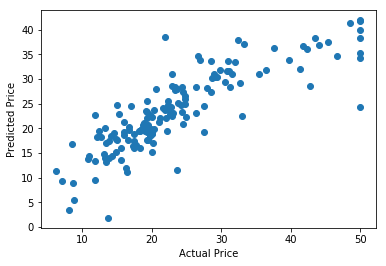

In [8]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
print (clf)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
#weights of sklearn sgd
LR_weights= clf.coef_ 
plt.scatter(y_test,Y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [9]:
print(mean_squared_error(y_test, Y_pred))

30.068160533746784


In [10]:
#Manual SGD regression
#initialize learning rate, W, B, iterations
W=np.zeros(shape=(1,13)) # W refers to Weight Vector
B=0 # B refers to Intercept to Zero means crossing through origin
iteration=1000 #number of times iterations
learningrate=0.01 # Learning rate
k_SGD_samples=30 # K Samples (Batch Size)
#while iteration>=0:
for i in range(iteration):
    B1=B #resetting B1 value to B
    W1=W #resetting W1 value to W
    dw=np.zeros(shape=(1,13))
    db=0
    
                                                                                                                                                         
    X_train_sample1 = X_train_sample.sample(k_SGD_samples)
    
    #split x and y
    y_delta = np.array(X_train_sample1['price'])
    x_delta=np.array(X_train_sample1.drop('price',axis=1))
    
    #print(X_train_sample)
    #print(x_delta)
    for j in range(k_SGD_samples):
        
        #formula for gradient Descent is
        # dw= 1/k summation of ((-2xi) (yi-wTxi-b)) which also can be written as -2/k summation of (xi*yi-(wTxi+b))
        #here WT*x+b is predicted value of Y
        y_predicted = np.dot(W1,x_delta[j])+B1
        #print(y_predicted)
        
        dw+=(-2) * x_delta[j] * (y_delta[j]-(y_predicted))
        
        # dc= 1/k summation of ((-2) (yi-wTxi-b)) which also can be written as -2/k summation of (yi-(wTxi+b))
        #here WT*x+b is predicted value of Y    
        db+=(-2) * (y_delta[j]-(y_predicted))
    
    #updating the parameters
    W= (W1-learningrate*(dw)/k_SGD_samples)
    B= (B1-learningrate*(db)/k_SGD_samples)
    #iteration-=1 
        
print(W)
print(B)

        

[[-0.99929192  1.21677956 -0.28406765  1.04763591 -1.65468368  2.21171328
  -0.10629682 -3.32773502  2.21967526 -1.64634712 -1.72362662  0.79627799
  -3.81248629]]
[22.15235308]


In [3]:
# asscalar numpy example https://www.geeksforgeeks.org/numpy-asscalar-in-python/
print(X_test.shape)
#predict y_test 
y_test_predict=[]
for i in range(len(X_test)):
    print(len(X_test))
    y_test_predict.append(np.asscalar(np.dot(W,X_test[i])+B))
print(y_test_predict)

NameError: name 'X_test' is not defined

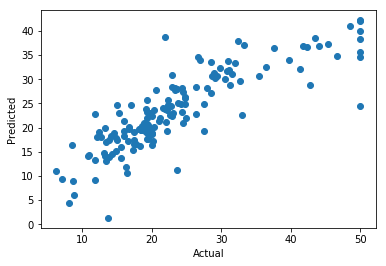

In [12]:
plt.scatter(y_test,y_test_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [13]:
print(mean_squared_error(y_test, y_test_predict))

29.702431193375393


# Comparision of Manual and Sklearn MSE

In [14]:
from prettytable import PrettyTable
    
Finaloutput = PrettyTable()

Finaloutput.field_names = ["Manual", "SKlearn","Learning Rate"]

Finaloutput.add_row([mean_squared_error(y_test, y_test_predict), mean_squared_error(y_test, Y_pred), 0.01])

print(Finaloutput)

+--------------------+--------------------+---------------+
|       Manual       |      SKlearn       | Learning Rate |
+--------------------+--------------------+---------------+
| 29.702431193375393 | 30.053993307124216 |      0.01     |
+--------------------+--------------------+---------------+


# Observation

<p>As per above table, we can see that both Manual and SKlearn mean squared error is very close to each other with learning rate 0.01</p>
<p>I have tried with other learning rates (0.0001,0.001,0.1), but compared to other learning rates, 0.01 is the closest one</p>

# Comparision of Manual and Sklearn Weights

In [15]:
   
Finaloutput1 = PrettyTable()


Finaloutput1.add_column("Manual Weights",W[0])
Finaloutput1.add_column("Sklearn Weights",LR_weights)

print(Finaloutput1)

+----------------------+----------------------+
|    Manual Weights    |   Sklearn Weights    |
+----------------------+----------------------+
| -1.0623561866042905  | -1.0867308497809667  |
|  1.105950230986739   |  1.2861028275782243  |
| -0.3822526064780196  | -0.06070359824008131 |
|  1.0652156160735258  |  1.031085512726034   |
| -1.4222976500910216  |  -1.688781597100795  |
|  2.5136262026474756  |  2.1673120242789015  |
| -0.21835229141032675 | -0.09530734912166106 |
|  -3.272373895401713  | -3.3262705586487673  |
|   2.19455949875501   |   2.88971893532093   |
| -1.6136024086050893  | -2.3927226507962667  |
| -1.6685891489771636  |  -1.745614183346274  |
|  0.9891418871779492  |  0.8542420585237336  |
| -3.6427001724432975  | -3.7084229909646123  |
+----------------------+----------------------+


# Observation

<p>As per above table, we can see that both Manual and SKlearn weights are close to each other</p>